# Restaurant Reviews Analysis

### *Import Libraries:*

In [53]:
import pandas as pd
import numpy as np
import spacy
from spacy.matcher import PhraseMatcher
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

### *Import Data:*

In [2]:
df = pd.read_json("./restaurant.json")
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
109,lDJIaF4eYRF4F7g6Zb9euw,lb0QUR5bc4O-Am4hNq9ZGg,r5PLDU-4mSbde5XekTXSCA,4,2,0,0,I used to work food service and my manager at ...,2013-01-27 17:54:54
1013,vvIzf3pr8lTqE_AOsxmgaA,MAmijW4ooUzujkufYYLMeQ,r5PLDU-4mSbde5XekTXSCA,4,0,0,0,We have been trying Eggplant sandwiches all ov...,2015-04-15 04:50:56
1204,UF-JqzMczZ8vvp_4tPK3bQ,slfi6gf_qEYTXy90Sw93sg,r5PLDU-4mSbde5XekTXSCA,5,1,0,0,Amazing Steak and Cheese... Better than any Ph...,2011-03-20 00:57:45
1251,geUJGrKhXynxDC2uvERsLw,N_-UepOzAsuDQwOUtfRFGw,r5PLDU-4mSbde5XekTXSCA,1,0,0,0,Although I have been going to DeFalco's for ye...,2018-07-17 01:48:23
1354,aPctXPeZW3kDq36TRm-CqA,139hD7gkZVzSvSzDPwhNNw,r5PLDU-4mSbde5XekTXSCA,2,0,0,0,"Highs: Ambience, value, pizza and deserts. Thi...",2018-01-21 10:52:58


### *Restaurant's Menu:*

In [3]:
menu = ["Cheese Steak", "Cheesesteak", "Steak and Cheese", "Italian Combo", "Tiramisu", "Cannoli",
        "Chicken Salad", "Chicken Spinach Salad", "Meatball", "Pizza", "Pizzas", "Spaghetti",
        "Bruchetta", "Eggplant", "Italian Beef", "Purista", "Pasta", "Calzones",  "Calzone",
        "Italian Sausage", "Chicken Cutlet", "Chicken Parm", "Chicken Parmesan", "Gnocchi",
        "Chicken Pesto", "Turkey Sandwich", "Turkey Breast", "Ziti", "Portobello", "Reuben",
        "Mozzarella Caprese",  "Corned Beef", "Garlic Bread", "Pastrami", "Roast Beef",
        "Tuna Salad", "Lasagna", "Artichoke Salad", "Fettuccini Alfredo", "Chicken Parmigiana",
        "Grilled Veggie", "Grilled Veggies", "Grilled Vegetable", "Mac and Cheese", "Macaroni",  
         "Prosciutto", "Salami"]

### *Find menu items in 1st review:*

In [4]:
# Load spacy model
nlp = spacy.blank("en")

In [5]:
# Get 1st Review from dataframe
first_review = df["text"].iloc[0]
print(first_review)

I used to work food service and my manager at the time recommended I try Defalco's. He knows food well so I was excited to try one of his favorites spots.

This place is really, really good. Lot of authentic Italian choices and they even have a grocery section with tons of legit Italian goodies. I had a Chicken Parmigiana sandwich that was to die for. Anytime my ex-manager comes back to town (he left for Vegas and I think he misses Defalco's more than anything else in the valley), he is sure to stop by and grab his favorite grub.

Parking is a bit tricky during busy hours and the wait times for food can get a bit long, so I recommend calling your order ahead of time (unless you want to take a look around while you wait, first-timers).


In [6]:
# Create tokenized version of first_review
review_doc = nlp(first_review)

In [7]:
# Create phrasematcher object
matcher = PhraseMatcher(nlp.vocab, attr = "LOWER")

In [8]:
# Create a list if tokens for each item in menu
menu_tokens = [nlp(item) for item in menu]

In [9]:
# Add item patterns to matcher
matcher.add("Menu", menu_tokens)

In [10]:
# Find the matches
matches = matcher(review_doc)
matches

[(12033345852358664780, 65, 67)]

In [11]:
review_doc[matches[0][1] : matches[0][2]]

Chicken Parmigiana

In [27]:
# Define defaultdict
item_ratings = defaultdict(list)

for i in range(len(df)):

    review = df["text"].iloc[i]

    review_doc = nlp(review)

    matches = matcher(review_doc)

    matched_items = [str(review_doc[match[1]:match[2]]) for match in matches]
    matched_items = [match.lower() for match in matched_items]

    for item in matched_items:
        item_ratings[item].append(df["stars"].iloc[i])

In [42]:
items_average_ratings = []
for i, j in item_ratings.items():
    items_average_ratings.append([i, np.mean(j), len(j)])

In [43]:
ratings = pd.DataFrame(items_average_ratings, columns = ["Menu_Item", "Average_Rating", "Number_of_Reviews"])

In [44]:
ratings

,Menu_Item,Average_Rating,Number_of_Reviews
0,chicken parmigiana,4.444444,18
1,eggplant,3.968421,95
2,steak and cheese,4.888889,9
3,pizza,4.304469,358
4,meatball,4.079755,163
5,cannoli,4.337079,89
6,pasta,4.392157,255
7,purista,4.641791,67
8,prosciutto,4.619048,63
9,cheese steak,4.454545,88


In [51]:
best_items = ratings.sort_values(by = "Average_Rating", ascending = False).iloc[0:10, 0:2]
print("Top 10 Best Items:")
print(best_items)

Top 10 Best Items:
             Menu_Item  Average_Rating
42         corned beef        5.000000
27       turkey breast        5.000000
25  fettuccini alfredo        5.000000
24     artichoke salad        5.000000
2     steak and cheese        4.888889
35              reuben        4.800000
36            pastrami        4.687500
40       chicken salad        4.666667
7              purista        4.641791
8           prosciutto        4.619048


In [52]:
worst_items = ratings.sort_values(by = "Average_Rating", ascending = True).iloc[0:10, 0:2]
print("Top 10 Worst Items:")
print(worst_items)

Top 10 Worst Items:
          Menu_Item  Average_Rating
18   chicken cutlet        3.545455
20  turkey sandwich        3.800000
32        spaghetti        3.853659
12    italian combo        3.909091
1          eggplant        3.968421
15     italian beef        4.000000
21       tuna salad        4.000000
31     garlic bread        4.021739
4          meatball        4.079755
34       portobello        4.111111


In [61]:
sorted_ratings = ratings.sort_values(by = "Average_Rating", ascending = False)

In [71]:
sns.set_style("whitegrid")

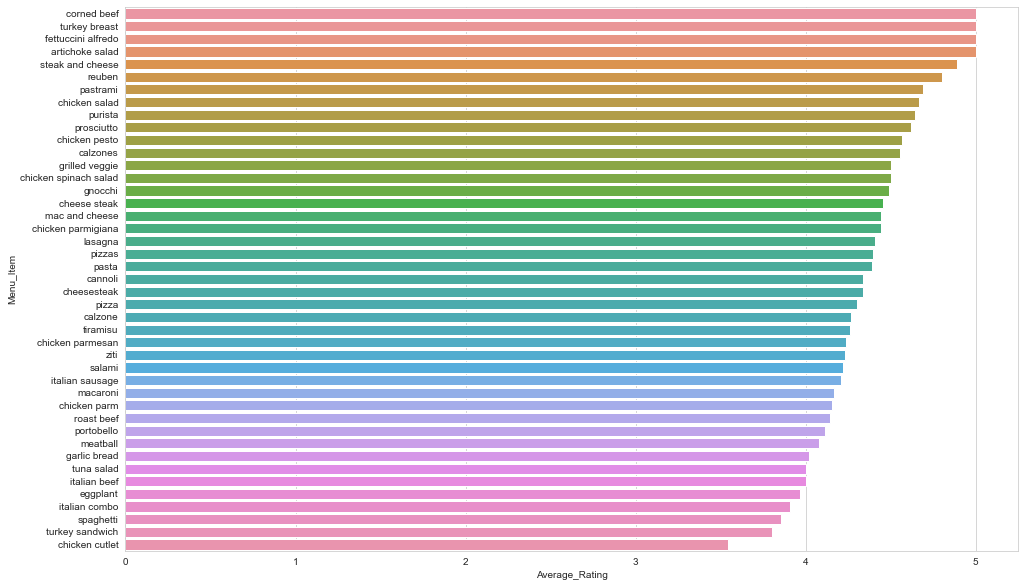

In [72]:
plt.figure(figsize = (16,10))
sns.barplot(y = sorted_ratings["Menu_Item"], x = sorted_ratings["Average_Rating"])
plt.show()

Chicken cutlet is the worst item
<br>Corned beef, turkey breast, fettuccini alfredo are best items